## Import the Required Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers,  models, datasets
from tensorflow.keras.layers import Conv2D, LeakyReLU

## Loading the Dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = datasets.mnist.load_data() #Used the Mnist Data Set

## Concatanating the Dataset

In [3]:
concatenated_data = np.concatenate((train_data, test_data), axis=0)
concatenated_labels = np.concatenate((train_labels, test_labels), axis=0)

#Normalization
concatenated_data = concatenated_data / 255.0

## Split the dataset

In [4]:
# Split the combined dataset into train, validation, and test sets
data_train, data_temp, labels_train, labels_temp = train_test_split(concatenated_data, concatenated_labels, test_size=0.4, random_state=42) #Split the training set
data_val, data_test, labels_val, labels_test = train_test_split(data_temp, labels_temp, test_size=0.5, random_state=42) #Split the validations and test set

## Reshape Data

In [5]:
#Convert each 2D image into 3D one
data_train = data_train.reshape(-1, 28, 28, 1)
data_val = data_val.reshape(-1, 28, 28, 1)
data_test = data_test.reshape(-1, 28, 28, 1)

## Building the model

In [6]:
model = tf.keras.models.Sequential()

# First convolutional layer with LeakyReLU activation, followed by Batch Normalization and MaxPooling
model.add(Conv2D(32, kernel_size=3, activation=LeakyReLU(alpha=0.001), input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Second convolutional layer with LeakyReLU activation, followed by Batch Normalization and MaxPooling
model.add(Conv2D(32, kernel_size=3, activation=LeakyReLU(alpha=0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Third convolutional layer with LeakyReLU activation, followed by Batch Normalization and MaxPooling
model.add(Conv2D(32, kernel_size=3, activation=LeakyReLU(alpha=0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

#Flattern Layer
model.add(tf.keras.layers.Flatten())

# Dense (fully connected) layer with 128 units and LeakyReLU activation
model.add(tf.keras.layers.Dense(128, activation=LeakyReLU(alpha=0.001)))

# Dropout layer to reduce overfitting during training
model.add(tf.keras.layers.Dropout(0.4))

# Output layer with 10 units (one for each class) and softmax activation for classification
model.add(tf.keras.layers.Dense(10, activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,714 (96.54 KB)

 Trainable params: 24,522 (95.79 KB)

 Non-trainable params: 192 (768.00 B)

In [8]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Training The Model

In [9]:
history = model.fit(data_train, labels_train, epochs=20, validation_data=(data_val, labels_val))

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5255 - loss: 1.4583 - val_accuracy: 0.9288 - val_loss: 0.2490
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9158 - loss: 0.2939 - val_accuracy: 0.9534 - val_loss: 0.1483
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9490 - loss: 0.1807 - val_accuracy: 0.9636 - val_loss: 0.1159
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9587 - loss: 0.1400 - val_accuracy: 0.9706 - val_loss: 0.0972
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9683 - loss: 0.1109 - val_accuracy: 0.9739 - val_loss: 0.0881
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9718 - loss: 0.0937 - val_accuracy: 0.9756 - val_loss: 0.0806
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9749 - loss: 0.0846 - val_accuracy: 0.9773 - val_loss: 0.0778
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9793 -

## Plotting the Training & Validation Loss

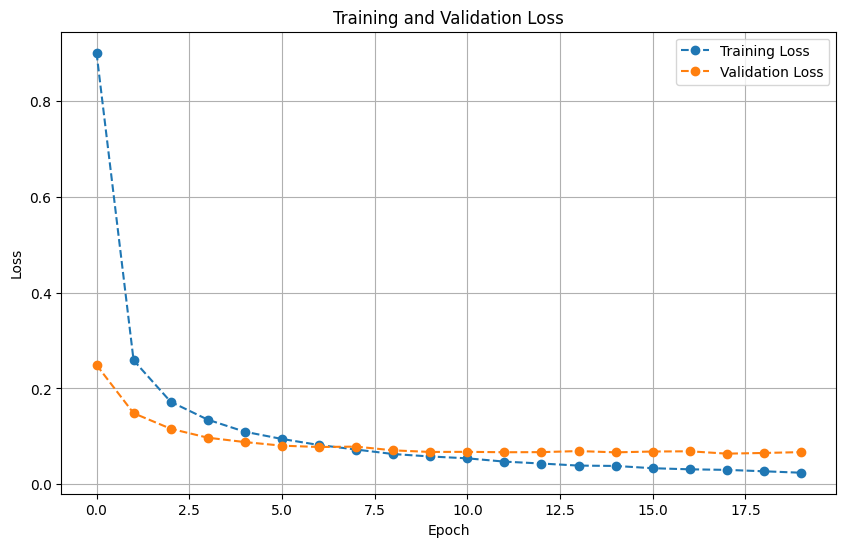

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o') #Training Loss
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o') # Validation Loss
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Evaluating Model Performance with Classification Report and Confusion Matrix Visualization

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1419
           1       0.99      0.99      0.99      1607
           2       0.97      0.96      0.97      1403
           3       0.98      0.98      0.98      1437
           4       0.98      0.99      0.98      1326
           5       0.98      0.98      0.98      1249
           6       0.99      0.98      0.98      1351
           7       0.98      0.97      0.98      1488
           8       0.98      0.97      0.97      1319
           9       0.97      0.98      0.97      1401

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



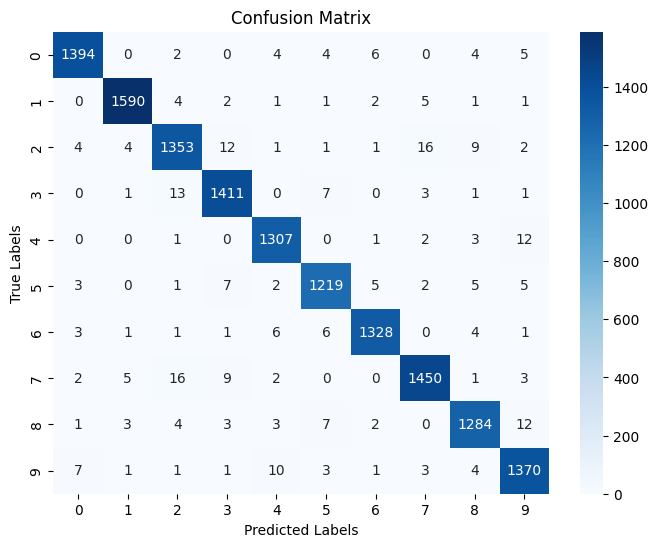

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Get predictions from the model
pred = model.predict(data_test)

pred_classes = np.argmax(pred, axis=1)

print(classification_report(labels_test, pred_classes, digits=2))
conf_matrix = confusion_matrix(labels_test, pred_classes)

class_labels = [str(i) for i in range(10)]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Training & Validation Losses for different learning rates

1. When Learning rate = 0.001

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9739 - loss: 0.0874 - val_accuracy: 0.9665 - val_loss: 0.1199
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9808 - loss: 0.0601 - val_accuracy: 0.9714 - val_loss: 0.0941
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9838 - loss: 0.0505 - val_accuracy: 0.9749 - val_loss: 0.0937
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9845 - loss: 0.0463 - val_accuracy: 0.9771 - val_loss: 0.0747
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9882 - loss: 0.0410 - val_accuracy: 0.9801 - val_loss: 0.0693
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9894 - loss: 0.0357 - val_accuracy: 0.9813 - val_loss: 0.0694
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9884 - loss: 0.0321 - val_accuracy: 0.9833 - val_loss: 0.0674
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9903 -

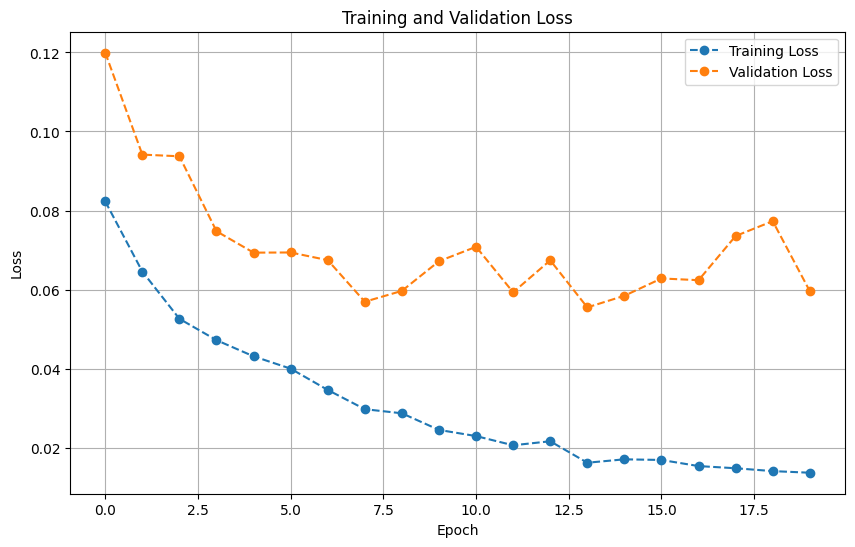

In [12]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(data_train, labels_train, epochs=20, validation_data=(data_val, labels_val))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o') #Training Loss
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o') # Validation Loss
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

2. When Learning rate = 0.01

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9586 - loss: 0.1595 - val_accuracy: 0.9668 - val_loss: 0.1345
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9745 - loss: 0.0966 - val_accuracy: 0.9624 - val_loss: 0.1275
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9762 - loss: 0.0861 - val_accuracy: 0.9751 - val_loss: 0.0989
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9781 - loss: 0.0788 - val_accuracy: 0.9476 - val_loss: 0.2014
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9792 - loss: 0.0723 - val_accuracy: 0.9804 - val_loss: 0.0735
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9782 - loss: 0.0799 - val_accuracy: 0.9792 - val_loss: 0.0851
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9816 - loss: 0.0684 - val_accuracy: 0.9795 - val_loss: 0.0874
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9830 -

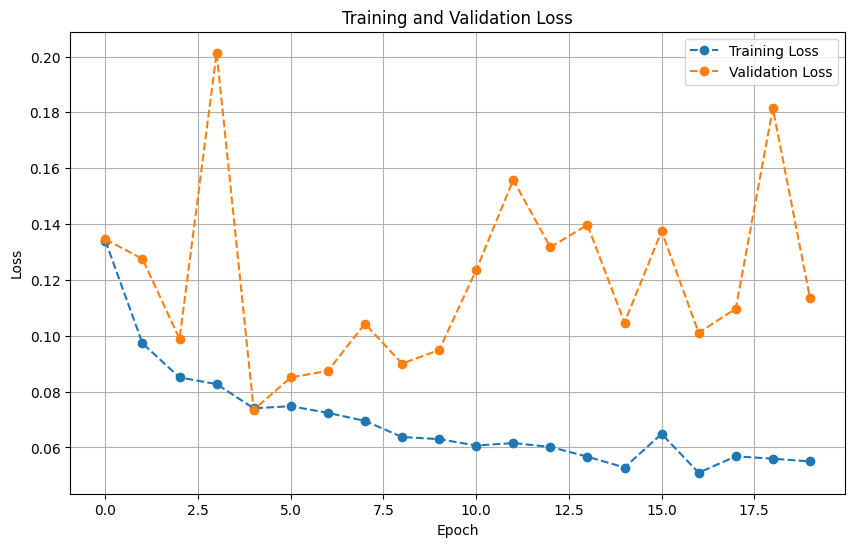

In [13]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(data_train, labels_train, epochs=20, validation_data=(data_val, labels_val))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o') #Training Loss
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o') # Validation Loss
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

3. When Learning rate = 0.1

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.6754 - loss: 1.3528 - val_accuracy: 0.8099 - val_loss: 0.7851
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.6941 - loss: 1.1610 - val_accuracy: 0.8749 - val_loss: 0.4126
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.7455 - loss: 1.0016 - val_accuracy: 0.9088 - val_loss: 0.3391
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.7632 - loss: 0.9640 - val_accuracy: 0.7735 - val_loss: 0.8611
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.7619 - loss: 1.0133 - val_accuracy: 0.8982 - val_loss: 0.3588
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7985 - loss: 0.8382 - val_accuracy: 0.8458 - val_loss: 1.2493
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.7894 - loss: 0.9627 - val_accuracy: 0.8183 - val_loss: 0.6447
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.8037 -

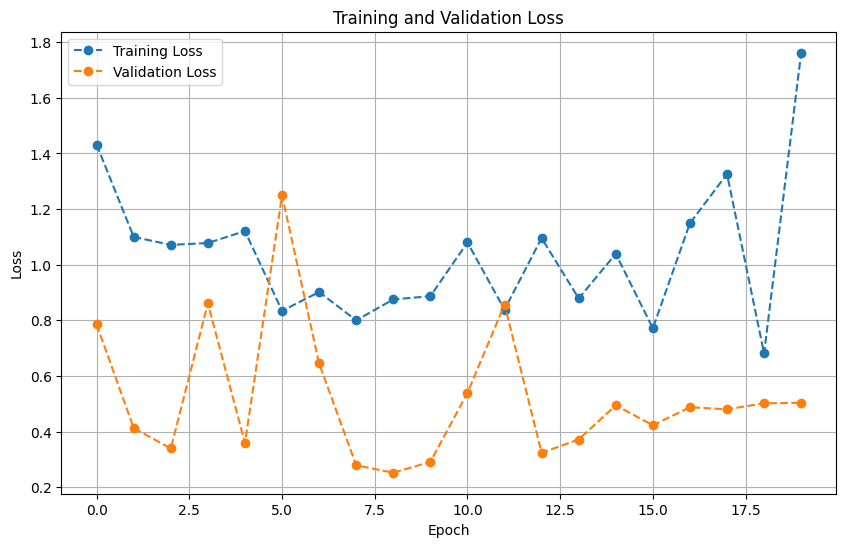

In [14]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(data_train, labels_train, epochs=20, validation_data=(data_val, labels_val))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o') #Training Loss
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o') # Validation Loss
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()